In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

50 - 94

In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
data.shape

(113999, 21)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


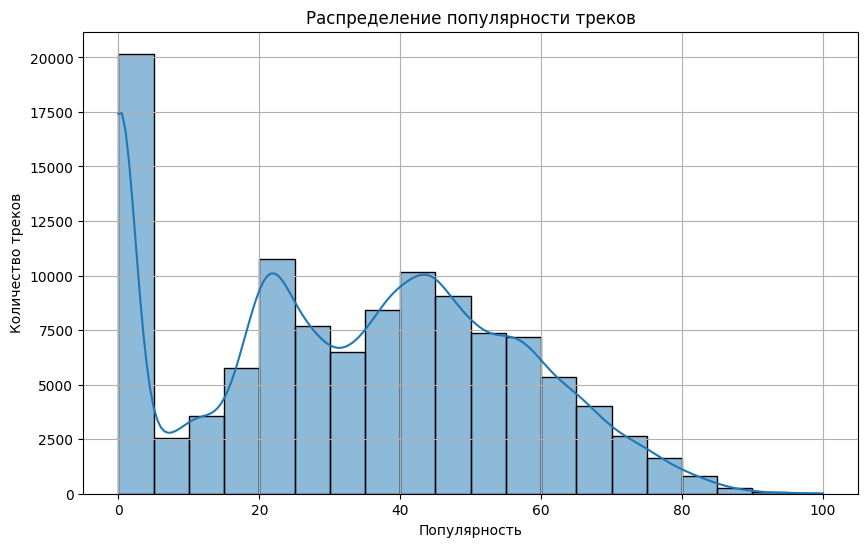

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.grid()
plt.show()

График показывает, что большинство треков имеют низкую или среднюю популярность, с небольшим количеством песен, достигающих высоких значений. Это может указывать на то, что высокая популярность является редким явлением.

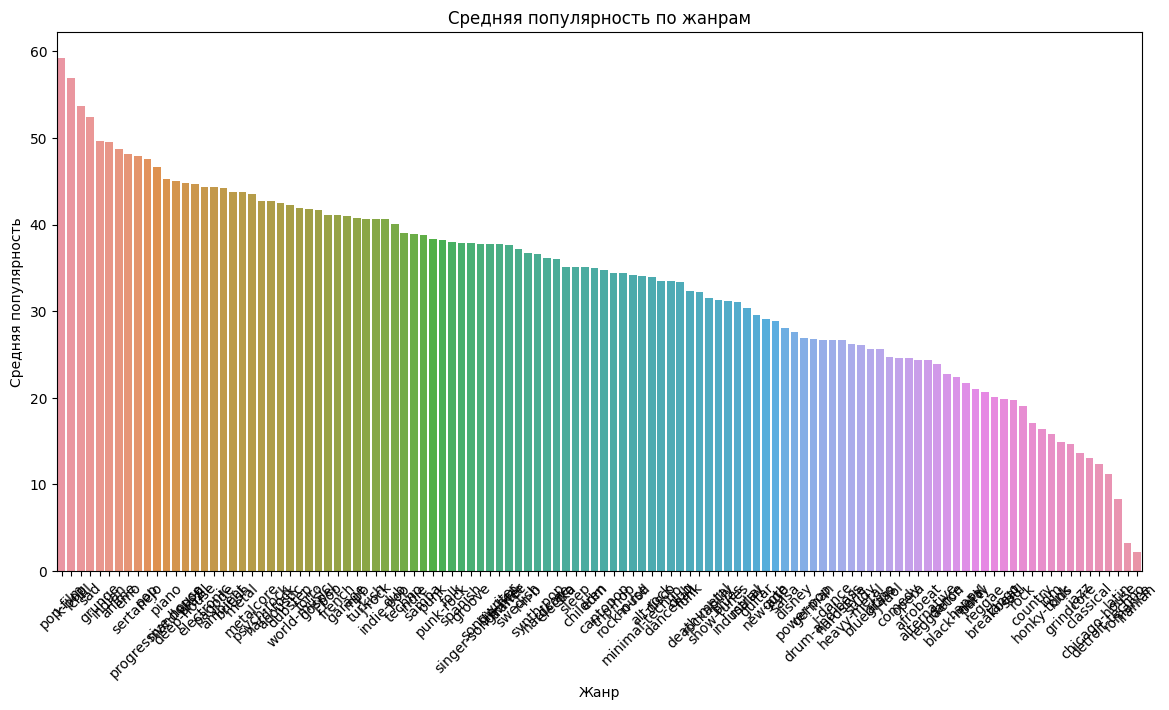

In [13]:
plt.figure(figsize=(14, 7))
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45)
plt.show()

График показывает, что некоторые жанры (например, поп и хип-хоп) имеют значительно более высокую среднюю популярность по сравнению с другими жанрами. Это может быть полезной информацией для артистов и продюсеров при выборе стиля музыки.

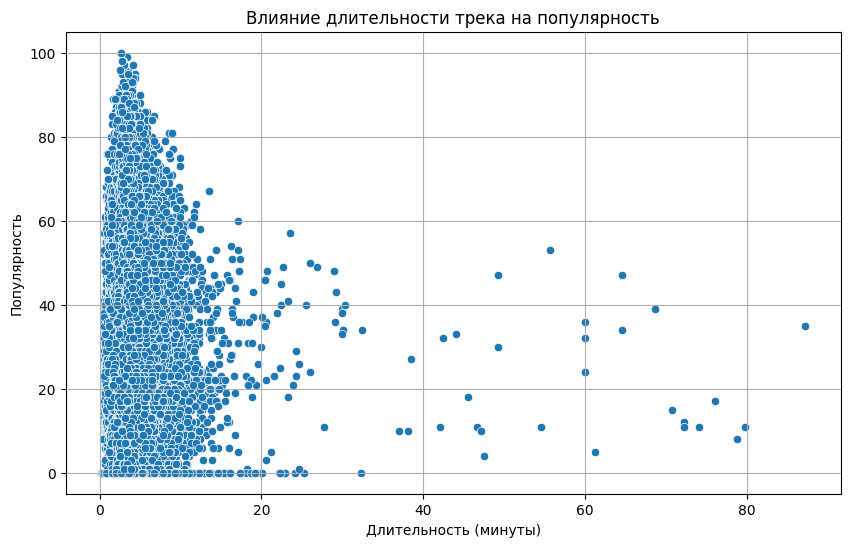

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['duration_ms'] / 60000, y=data['popularity'])
plt.title('Влияние длительности трека на популярность')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Популярность')
plt.grid()
plt.show()

График демонстрирует отсутствие четкой зависимости между длительностью трека и его популярностью. Однако можно заметить небольшое увеличение популярности для треков средней длины (около 3-4 минут).

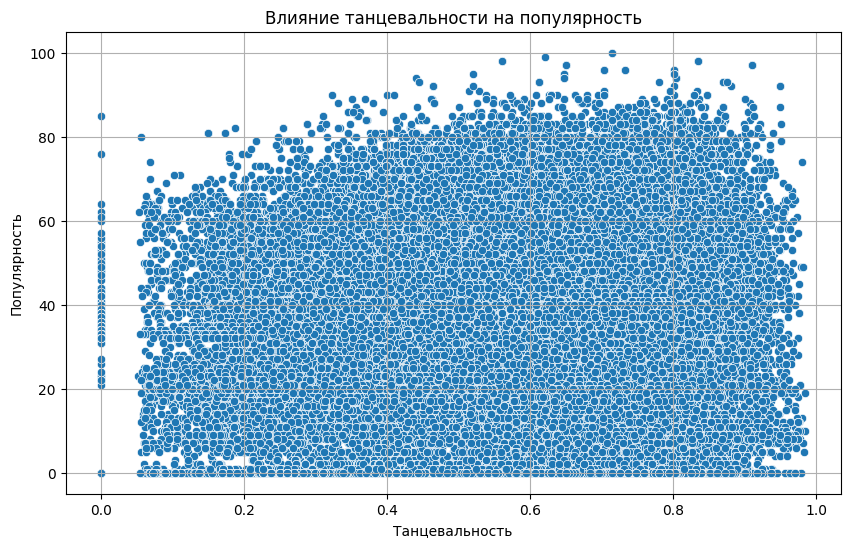

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['danceability'], y=data['popularity'])
plt.title('Влияние танцевальности на популярность')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.grid()
plt.show()

График демонстрирует положительную связь между танцевальностью и популярностью. Это подтверждает гипотезу о том, что более танцевальные треки имеют тенденцию быть более популярными среди слушателей.

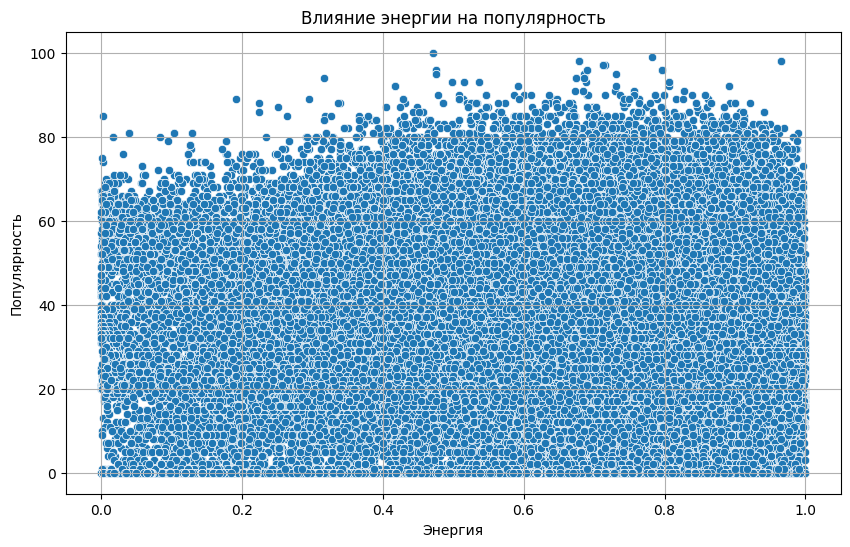

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['energy'], y=data['popularity'])
plt.title('Влияние энергии на популярность')
plt.xlabel('Энергия')
plt.ylabel('Популярность')
plt.grid()
plt.show()

График показывает, что существует значительная положительная корреляция между энергией и популярностью. Это подтверждает, что высокоэнергетические треки чаще становятся успешными.

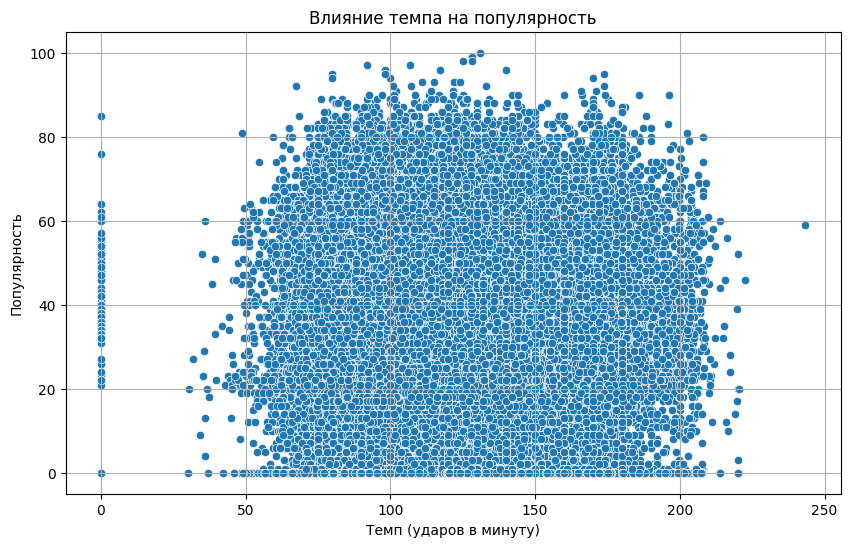

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tempo'], y=data['popularity'])
plt.title('Влияние темпа на популярность')
plt.xlabel('Темп (ударов в минуту)')
plt.ylabel('Популярность')
plt.grid()
plt.show()

График показывает, что темп также имеет положительное влияние на популярность, но связь не так выражена, как у танцевальности или энергии. Это может указывать на то, что другие факторы также играют важную роль в восприятии музыки.

In [18]:
# Новый признак: длительность в минутах
data['duration_minutes'] = data['duration_ms'] / 60000

# Новый признак: логарифм популярности
data['log_popularity'] = np.log1p(data['popularity'])

# Новый признак: классификация по танцевальности
data['danceability_category'] = pd.cut(data['danceability'], bins=[0, 0.5, 1], labels=['Low', 'High'])
data['explicit_numeric'] = data['explicit'].astype(int)
data['dance_energy'] = data['danceability'] * data['energy']

/tmp/ipykernel_17/4003163255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_minutes'] = data['duration_ms'] / 60000
/tmp/ipykernel_17/4003163255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_popularity'] = np.log1p(data['popularity'])
/tmp/ipykernel_17/4003163255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [19]:
import pandas as pd

# 1. Проверка пропусков
missing_values = data.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Удаление строк с пропусками
data_cleaned = data.dropna()

# Проверка после удаления пропусков
print("\nПропуски после очистки:\n", data_cleaned.isnull().sum())

# 2. Проверка дубликатов
duplicates = data_cleaned.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# Удаление дубликатов (если бы они были)
data_cleaned = data_cleaned.drop_duplicates()

# 3. Проверка аномалий
print("\nОписание числовых данных:\n", data_cleaned.describe())

# Проверка минимальных значений для возможных аномалий
min_values = data_cleaned[['popularity', 'duration_ms', 'loudness']].min()
print("\nМинимальные значения:\n", min_values)

# Удаление строк с длительностью равной 0 (если считаем это ошибкой)
data_cleaned = data_cleaned[data_cleaned['duration_ms'] > 0]

# Проверка размера данных после очистки
print("\nРазмер данных после очистки:", data_cleaned.shape)


Пропуски в данных:
 Unnamed: 0                 0
track_id                   0
artists                    0
album_name                 0
track_name                 0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre                0
duration_minutes           0
log_popularity             0
danceability_category    157
explicit_numeric           0
dance_energy               0
dtype: int64

Пропуски после очистки:
 Unnamed: 0               0
track_id                 0
artists                  0
album_name               0
track_name               0
popularity               0
duration_ms              

In [20]:
# Удаляем колонки, которые не нужны для анализа
columns_to_drop = ['Unnamed: 0', 'artists', 'track_id', 'album_name', 'track_name']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

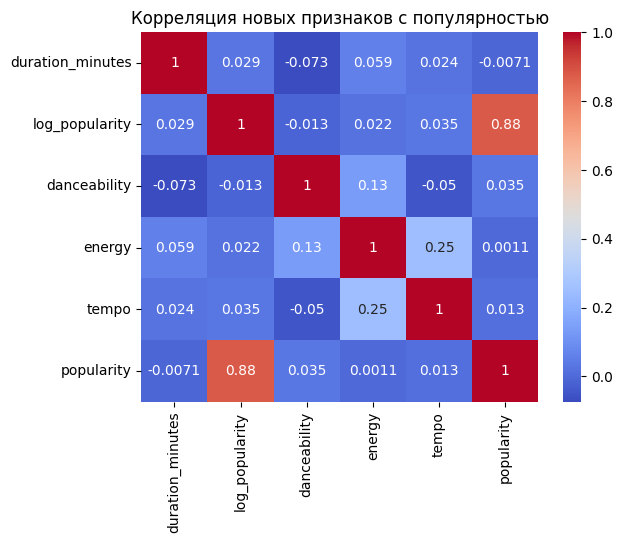

In [21]:
# Корреляция новых признаков с популярностью
correlation_matrix = data[['duration_minutes', 'log_popularity', 'danceability', 'energy', 'tempo', 'popularity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция новых признаков с популярностью')
plt.show()

График показывает, что логарифм популярности имеет сильную положительную корреляцию с танцевальностью и энергией. Это подтверждает гипотезу о том, что более танцевальные и энергичные треки имеют высокий уровень популярности.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Подготовка данных
# Разделение признаков и целевой переменной
X = data.drop(columns=['popularity'])
y = data['popularity']

# Определение текстовых (категориальных) и числовых столбцов
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Применение One-Hot Encoding для категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Функция для вывода метрик
def calculate_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")
    return mse, rmse, r2

# 2. Линейная модель
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
mse_lr, rmse_lr, r2_lr = calculate_metrics(y_test, y_pred_lr, "Линейная модель")

# 3. Дерево решений
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree, rmse_tree, r2_tree = calculate_metrics(y_test, y_pred_tree, "Дерево решений")

# 4. Градиентный бустинг
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb, rmse_gb, r2_gb = calculate_metrics(y_test, y_pred_gb, "Градиентный бустинг")

# 5. Нейронная сеть
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Регрессионный выход
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn, rmse_nn, r2_nn = calculate_metrics(y_test, y_pred_nn, "Нейронная сеть")

# Итоговое сравнение моделей
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "Neural Network"],
    "MSE": [mse_lr, mse_tree, mse_gb, mse_nn],
    "RMSE": [rmse_lr, rmse_tree, rmse_gb, rmse_nn],
    "R2": [r2_lr, r2_tree, r2_gb, r2_nn]
}

results_df = pd.DataFrame(results)
print("\nИтоговые результаты:")
print(results_df)

Линейная модель: MSE=49.48, RMSE=7.03, R2=0.90
Дерево решений: MSE=0.00, RMSE=0.00, R2=1.00
Градиентный бустинг: MSE=0.00, RMSE=0.03, R2=1.00


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 374s 131ms/step - loss: 271.9611 - mae: 8.6870
Epoch 2/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 375s 132ms/step - loss: 10.8291 - mae: 2.4452
Epoch 3/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 376s 132ms/step - loss: 3.0203 - mae: 1.2702
Epoch 4/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 380s 133ms/step - loss: 2.2613 - mae: 1.1177
Epoch 5/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 381s 134ms/step - loss: 1.7863 - mae: 0.9947
Epoch 6/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 381s 134ms/step - loss: 1.3332 - mae: 0.8459
Epoch 7/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 383s 134ms/step - loss: 1.1881 - mae: 0.8052
Epoch 8/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 384s 135ms/step - loss: 0.9449 - mae: 0.7111
Epoch 9/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 384s 135ms/step - loss: 0.8987 - mae: 0.6953
Epoch 10/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 384s 135ms/step - loss: 0.7826 - mae: 0.6489
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Нейронная сеть: MSE=2.10, RMSE=1.45, R2=1.00

Итоговые результаты:
               Mod